In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams.update({'font.size': 14})
from scipy.stats import linregress
from scipy.stats import pearsonr, spearmanr
from scipy.stats import ranksums
from scipy.stats import ttest_ind
from scipy.spatial import distance
from glob import glob
from sklearn.metrics import mean_squared_error

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

In [3]:
#load info
Patient_Info = pd.read_csv('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/initial_info.csv', index_col=0)

In [4]:
#load initial file
Initial_absolute = pd.read_table('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/initial_absolute.txt', index_col=0)
Initial_absolute.index = Initial_absolute.index.map(lambda x: str(x)[:-2])

In [5]:
#load recurrence file
Recurrence_absolute = pd.read_table('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/recurrence_absolute.txt', index_col=0)
Recurrence_absolute.index = Recurrence_absolute.index.map(lambda x: str(x)[:-2])

In [6]:
#add patient info for the ones with initial data
common = Initial_absolute.index.intersection(Patient_Info.index)
common2 = Recurrence_absolute.index.intersection(Patient_Info.index)
final_common = Recurrence_absolute.index.intersection(Initial_absolute.index)
final_common

Index(['PS001', 'PS002', 'PS003', 'PS004', 'PS005', 'PS006', 'PS007', 'PS008',
       'PS009', 'PS010',
       ...
       'PSX20', 'PSX18', 'PSX01', 'PSX14', 'PSX07', 'PSX09', 'PSX08', 'PSX02',
       'PSX05', 'PSX13'],
      dtype='object', name='Mixture', length=181)

In [7]:
combined_data = Patient_Info
combined_data = combined_data[combined_data.index.isin(final_common)]
pathology = combined_data.loc[:, combined_data.columns == "Molecular pathology (per GLASS)"]

In [8]:
#selecting for glioblastoma
select = pathology[pathology['Molecular pathology (per GLASS)'].str.contains("Glioblastoma")]
pathology.loc[select.index, 'Histology'] = "Glioblastoma"

/Users/dawonchoi/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/dawonchoi/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [9]:
#selecting for Diffuse Astrocytoma
select2 = pathology[pathology['Molecular pathology (per GLASS)'].str.contains("Diffuse Astrocytoma")]
pathology.loc[select2.index, 'Histology'] = "Diffuse Astrocytoma"

/Users/dawonchoi/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/dawonchoi/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [10]:
#selecting for Anaplastic Astrocytoma
select3 = pathology[pathology['Molecular pathology (per GLASS)'].str.contains("Anaplastic Astrocytoma")]
pathology.loc[select3.index, 'Histology'] = "Anaplastic Astrocytoma"

In [11]:
#selecting for Oligodendroglioma
select4 = pathology[pathology['Molecular pathology (per GLASS)'].str.contains("Oligodendroglioma")]
pathology.loc[select4.index, 'Histology'] = "Oligodendroglioma"

In [12]:
#selecting for Anaplastic Oligodendroglioma
select5 = pathology[pathology['Molecular pathology (per GLASS)'].str.contains("Anaplastic Oligodendroglioma")]
pathology.loc[select5.index, 'Histology'] = "Anaplastic Oligodendroglioma"

In [13]:
initial_final = pd.concat([pathology, Initial_absolute], axis=1)
initial_final = initial_final[initial_final.index.isin(final_common)]
initial_final.index.name = 'Mixture'
initial_final = initial_final.drop(['Molecular pathology (per GLASS)', 'P-value','Correlation','RMSE'], axis=1)
initial_final = initial_final.sort_values(by='Mixture')
initial_final['Type'] = 'Initial'
initial_final

Histology   Naive B  Memory B  CD8+ naive T  \
Mixture                                                                   
PS001                    Glioblastoma  0.028152  0.075570      0.146253   
PS002                    Glioblastoma  0.021507  0.136212      0.158629   
PS003                    Glioblastoma  0.006610  0.114975      0.270254   
PS004                    Glioblastoma  0.009584  0.111689      0.202716   
PS005                    Glioblastoma  0.026582  0.101913      0.213033   
PS006                    Glioblastoma  0.000000  0.173038      0.208682   
PS007                    Glioblastoma  0.043610  0.111419      0.170748   
PS008                    Glioblastoma  0.009015  0.181356      0.341306   
PS009                    Glioblastoma  0.000000  0.180929      0.227053   
PS010                    Glioblastoma  0.035446  0.190856      0.264285   
PS012                    Glioblastoma  0.000000  0.227015      0.330873   
PS019                    Glioblastoma  0.041092  0.094917      0.159708   
PS020                    Glioblastoma  0.018851  0.095849      0.132810   
PS021                    Glioblastoma  0.031260  0.104849      0.167074   
PS022                    Glioblastoma  0.046333  0.057280      0.106257   
PS023                    Glioblastoma  0.056691  0.068103      0.173580   
PS024                    Glioblastoma  0.037383  0.089116      0.106058   
PS025                    Glioblastoma  0.027664  0.058336      0.136355   
PS026                    Glioblastoma  0.033348  0.094752      0.160881   
PS027                    Glioblastoma  0.000000  0.170669      0.209407   
PS029                    Glioblastoma  0.040873  0.066661      0.129265   
PS030                    Glioblastoma  0.000000  0.161641      0.231808   
PS033                    Glioblastoma  0.021235  0.067410      0.115173   
PS034                    Glioblastoma  0.031436  0.077851      0.094234   
PS035                    Glioblastoma  0.012059  0.133198      0.211579   
PS038                    Glioblastoma  0.025724  0.113643      0.195022   
PS042                    Glioblastoma  0.017585  0.063261      0.097207   
PS056                    Glioblastoma  0.016476  0.106523      0.192954   
PS060                    Glioblastoma  0.036687  0.087211      0.137172   
PS061                    Glioblastoma  0.009800  0.082625      0.218877   
PS063                    Glioblastoma  0.030610  0.094506      0.132895   
PS064                    Glioblastoma  0.001836  0.128649      0.258588   
PS065                    Glioblastoma  0.011559  0.123663      0.175774   
PS066                    Glioblastoma  0.038893  0.089130      0.199116   
PS067                    Glioblastoma  0.043579  0.071020      0.172094   
PS068                    Glioblastoma  0.000000  0.191604      0.314487   
PS070                    Glioblastoma  0.031412  0.108512      0.180145   
PS071                    Glioblastoma  0.066214  0.045448      0.375040   
PS072                    Glioblastoma  0.034604  0.102631      0.180071   
PS074                    Glioblastoma  0.020922  0.100345      0.200462   
PS076                    Glioblastoma  0.050085  0.125800      0.316320   
PS078                    Glioblastoma  0.013535  0.115093      0.180158   
PS080                    Glioblastoma  0.029922  0.129008      0.263694   
PS081                    Glioblastoma  0.000748  0.139635      0.238920   
PS082                    Glioblastoma  0.036096  0.065714      0.168822   
PS083                    Glioblastoma  0.015370  0.093817      0.119889   
PS084                    Glioblastoma  0.005533  0.194311      0.312928   
PS085                    Glioblastoma  0.023375  0.076980      0.103234   
PS087                    Glioblastoma  0.018384  0.091013      0.170389   
PS088                    Glioblastoma  0.021780  0.103492      0.126180   
PS089                    Glioblastoma  0.023155  0.120318      0.157499   
PS090                    Glioblastoma  0.027930  0.07

In [14]:
recurrence_final = pd.concat([pathology, Recurrence_absolute], axis=1)
recurrence_final = recurrence_final[recurrence_final.index.isin(final_common)]
recurrence_final.index.name = 'Mixture'
recurrence_final = recurrence_final.drop(['Molecular pathology (per GLASS)', 'P-value','Correlation','RMSE'], axis=1)
recurrence_final = recurrence_final.sort_values(by='Mixture')
recurrence_final['Type'] = 'Recurrence'
recurrence_final

Histology   Naive B  Memory B  CD8+ naive T  \
Mixture                                                                   
PS001                    Glioblastoma  0.090779  0.033450      0.181110   
PS002                    Glioblastoma  0.066847  0.077545      0.140768   
PS003                    Glioblastoma  0.064486  0.102726      0.146381   
PS004                    Glioblastoma  0.039100  0.100190      0.075614   
PS005                    Glioblastoma  0.093696  0.070452      0.207710   
PS006                    Glioblastoma  0.070762  0.053967      0.174030   
PS007                    Glioblastoma  0.081268  0.049196      0.066075   
PS008                    Glioblastoma  0.089660  0.093435      0.277336   
PS009                    Glioblastoma  0.080203  0.089883      0.245205   
PS010                    Glioblastoma  0.094486  0.076544      0.214490   
PS012                    Glioblastoma  0.099367  0.137877      0.286119   
PS019                    Glioblastoma  0.057311  0.060226      0.082018   
PS020                    Glioblastoma  0.049618  0.057960      0.127500   
PS021                    Glioblastoma  0.038426  0.043247      0.111705   
PS022                    Glioblastoma  0.037830  0.084337      0.138358   
PS023                    Glioblastoma  0.059788  0.069938      0.138160   
PS024                    Glioblastoma  0.052624  0.033865      0.094558   
PS025                    Glioblastoma  0.022442  0.050962      0.095163   
PS026                    Glioblastoma  0.036980  0.065449      0.081083   
PS027                    Glioblastoma  0.053323  0.097007      0.175736   
PS029                    Glioblastoma  0.051247  0.053211      0.147569   
PS030                    Glioblastoma  0.066002  0.060550      0.089975   
PS033                    Glioblastoma  0.055759  0.021823      0.101395   
PS034                    Glioblastoma  0.060024  0.041259      0.072144   
PS035                    Glioblastoma  0.058138  0.044543      0.084964   
PS038                    Glioblastoma  0.103398  0.018619      0.120164   
PS042                    Glioblastoma  0.032544  0.058212      0.120455   
PS056                    Glioblastoma  0.083861  0.063347      0.176442   
PS060                    Glioblastoma  0.067071  0.044282      0.139501   
PS061                    Glioblastoma  0.067104  0.033007      0.151864   
PS063                    Glioblastoma  0.059308  0.036481      0.114147   
PS064                    Glioblastoma  0.100220  0.000000      0.193478   
PS065                    Glioblastoma  0.074535  0.073347      0.152199   
PS066                    Glioblastoma  0.080089  0.059685      0.153696   
PS067                    Glioblastoma  0.077313  0.017863      0.112563   
PS068                    Glioblastoma  0.090429  0.051050      0.180314   
PS070                    Glioblastoma  0.121078  0.037626      0.220041   
PS071                    Glioblastoma  0.131879  0.013129      0.236413   
PS072                    Glioblastoma  0.044860  0.084932      0.078488   
PS074                    Glioblastoma  0.049080  0.067078      0.085550   
PS076                    Glioblastoma  0.097187  0.057282      0.264207   
PS078                    Glioblastoma  0.068498  0.074316      0.137591   
PS080                    Glioblastoma  0.084095  0.064951      0.164684   
PS081                    Glioblastoma  0.067704  0.101841      0.191437   
PS082                    Glioblastoma  0.045979  0.055399      0.139870   
PS083                    Glioblastoma  0.142033  0.004819      0.194871   
PS084                    Glioblastoma  0.047332  0.109391      0.249294   
PS085                    Glioblastoma  0.048477  0.058719      0.088062   
PS087                    Glioblastoma  0.079567  0.072019      0.219356   
PS088                    Glioblastoma  0.050951  0.090154      0.137013   
PS089                    Glioblastoma  0.037390  0.080175      0.134468   
PS090                    Glioblastoma  0.042951  0.06

In [15]:
finalfinal = pd.concat([initial_final, recurrence_final]) 
finalfinal

Histology   Naive B  Memory B  CD8+ naive T  \
Mixture                                                                   
PS001                    Glioblastoma  0.028152  0.075570      0.146253   
PS002                    Glioblastoma  0.021507  0.136212      0.158629   
PS003                    Glioblastoma  0.006610  0.114975      0.270254   
PS004                    Glioblastoma  0.009584  0.111689      0.202716   
PS005                    Glioblastoma  0.026582  0.101913      0.213033   
PS006                    Glioblastoma  0.000000  0.173038      0.208682   
PS007                    Glioblastoma  0.043610  0.111419      0.170748   
PS008                    Glioblastoma  0.009015  0.181356      0.341306   
PS009                    Glioblastoma  0.000000  0.180929      0.227053   
PS010                    Glioblastoma  0.035446  0.190856      0.264285   
PS012                    Glioblastoma  0.000000  0.227015      0.330873   
PS019                    Glioblastoma  0.041092  0.094917      0.159708   
PS020                    Glioblastoma  0.018851  0.095849      0.132810   
PS021                    Glioblastoma  0.031260  0.104849      0.167074   
PS022                    Glioblastoma  0.046333  0.057280      0.106257   
PS023                    Glioblastoma  0.056691  0.068103      0.173580   
PS024                    Glioblastoma  0.037383  0.089116      0.106058   
PS025                    Glioblastoma  0.027664  0.058336      0.136355   
PS026                    Glioblastoma  0.033348  0.094752      0.160881   
PS027                    Glioblastoma  0.000000  0.170669      0.209407   
PS029                    Glioblastoma  0.040873  0.066661      0.129265   
PS030                    Glioblastoma  0.000000  0.161641      0.231808   
PS033                    Glioblastoma  0.021235  0.067410      0.115173   
PS034                    Glioblastoma  0.031436  0.077851      0.094234   
PS035                    Glioblastoma  0.012059  0.133198      0.211579   
PS038                    Glioblastoma  0.025724  0.113643      0.195022   
PS042                    Glioblastoma  0.017585  0.063261      0.097207   
PS056                    Glioblastoma  0.016476  0.106523      0.192954   
PS060                    Glioblastoma  0.036687  0.087211      0.137172   
PS061                    Glioblastoma  0.009800  0.082625      0.218877   
PS063                    Glioblastoma  0.030610  0.094506      0.132895   
PS064                    Glioblastoma  0.001836  0.128649      0.258588   
PS065                    Glioblastoma  0.011559  0.123663      0.175774   
PS066                    Glioblastoma  0.038893  0.089130      0.199116   
PS067                    Glioblastoma  0.043579  0.071020      0.172094   
PS068                    Glioblastoma  0.000000  0.191604      0.314487   
PS070                    Glioblastoma  0.031412  0.108512      0.180145   
PS071                    Glioblastoma  0.066214  0.045448      0.375040   
PS072                    Glioblastoma  0.034604  0.102631      0.180071   
PS074                    Glioblastoma  0.020922  0.100345      0.200462   
PS076                    Glioblastoma  0.050085  0.125800      0.316320   
PS078                    Glioblastoma  0.013535  0.115093      0.180158   
PS080                    Glioblastoma  0.029922  0.129008      0.263694   
PS081                    Glioblastoma  0.000748  0.139635      0.238920   
PS082                    Glioblastoma  0.036096  0.065714      0.168822   
PS083                    Glioblastoma  0.015370  0.093817      0.119889   
PS084                    Glioblastoma  0.005533  0.194311      0.312928   
PS085                    Glioblastoma  0.023375  0.076980      0.103234   
PS087                    Glioblastoma  0.018384  0.091013      0.170389   
PS088                    Glioblastoma  0.021780  0.103492      0.126180   
PS089                    Glioblastoma  0.023155  0.120318      0.157499   
PS090                    Glioblastoma  0.027930  0.07

In [16]:
final_mdf = pd.melt(finalfinal.reset_index(), id_vars=('Mixture', 'Type','Histology'))
final_mdf

Mixture        Type                     Histology  \
0      PS001     Initial                  Glioblastoma   
1      PS002     Initial                  Glioblastoma   
2      PS003     Initial                  Glioblastoma   
3      PS004     Initial                  Glioblastoma   
4      PS005     Initial                  Glioblastoma   
5      PS006     Initial                  Glioblastoma   
6      PS007     Initial                  Glioblastoma   
7      PS008     Initial                  Glioblastoma   
8      PS009     Initial                  Glioblastoma   
9      PS010     Initial                  Glioblastoma   
10     PS012     Initial                  Glioblastoma   
11     PS019     Initial                  Glioblastoma   
12     PS020     Initial                  Glioblastoma   
13     PS021     Initial                  Glioblastoma   
14     PS022     Initial                  Glioblastoma   
15     PS023     Initial                  Glioblastoma   
16     PS024     Initial                  Glioblastoma   
17     PS025     Initial                  Glioblastoma   
18     PS026     Initial                  Glioblastoma   
19     PS027     Initial                  Glioblastoma   
20     PS029     Initial                  Glioblastoma   
21     PS030     Initial                  Glioblastoma   
22     PS033     Initial                  Glioblastoma   
23     PS034     Initial                  Glioblastoma   
24     PS035     Initial                  Glioblastoma   
25     PS038     Initial                  Glioblastoma   
26     PS042     Initial                  Glioblastoma   
27     PS056     Initial                  Glioblastoma   
28     PS060     Initial                  Glioblastoma   
29     PS061     Initial                  Glioblastoma   
30     PS063     Initial                  Glioblastoma   
31     PS064     Initial                  Glioblastoma   
32     PS065     Initial                  Glioblastoma   
33     PS066     Initial                  Glioblastoma   
34     PS067     Initial                  Glioblastoma   
35     PS068     Initial                  Glioblastoma   
36     PS070     Initial                  Glioblastoma   
37     PS071     Initial                  Glioblastoma   
38     PS072     Initial                  Glioblastoma   
39     PS074     Initial                  Glioblastoma   
40     PS076     Initial                  Glioblastoma   
41     PS078     Initial                  Glioblastoma   
42     PS080     Initial                  Glioblastoma   
43     PS081     Initial                  Glioblastoma   
44     PS082     Initial                  Glioblastoma   
45     PS083     Initial                  Glioblastoma   
46     PS084     Initial                  Glioblastoma   
47     PS085     Initial                  Glioblastoma   
48     PS087     Initial                  Glioblastoma   
49     PS088     Initial                  Glioblastoma   
50     PS089     Initial                  Glioblastoma   
51     PS090     Initial                  Glioblastoma   
52     PS092     Initial                  Glioblastoma   
53     PS093     Initial                  Glioblastoma   
54     PS095     Initial                  Glioblastoma   
55     PS099     Initial                  Glioblastoma   
56     PS100     Initial                  Glioblastoma   
57     PS101     Initial                  Glioblastoma   
58     PS102     Initial                  Glioblastoma   
59     PS103     Initial                  Glioblastoma   
60     PS104     Initial                  Glioblastoma   
61     PS106     Initial                  Glioblastoma   
62     PS107     Initial                  Glioblastoma   
63     PS108     Initial                  Glioblastoma   
64     PS109     Initial                  Glioblastoma   
65     PS110     Initial                  Glioblastoma   
66     PS111     Initial                  Glioblastoma   
67     PS112     Initial                  Glioblastoma   
68 

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Diffuse Astrocytoma_Initial v.s. Diffuse Astrocytoma_Recurrence: t-test independent samples with Bonferroni correction, P_val=9.401e-09 stat=-7.210e+00
Glioblastoma_Initial v.s. Glioblastoma_Recurrence: t-test independent samples with Bonferroni correction, P_val=4.741e-34 stat=-1.449e+01
Anaplastic Astrocytoma_Initial v.s. Anaplastic Astrocytoma_Recurrence: t-test independent samples with Bonferroni correction, P_val=4.563e-03 stat=-3.830e+00
Oligodendroglioma_Initial v.s. Oligodendroglioma_Recurrence: t-test independent samples with Bonferroni correction, P_val=3.505e-02 stat=-3.042e+00
Anaplastic Oligodendroglioma_Initial v.s. Anaplastic Oligodendroglioma_Recurrence: t-test independent samples with Bonferroni correction, P_val=1.208e-03 stat=-4.884e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < 

<ipython-input-20-b11dbe073ca8>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5,5.1))


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Diffuse Astrocytoma_Initial v.s. Diffuse Astrocytoma_Recurrence: t-test independent samples with Bonferroni correction, P_val=4.297e-02 stat=2.727e+00
Glioblastoma_Initial v.s. Glioblastoma_Recurrence: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-9.471e-01
Anaplastic Astrocytoma_Initial v.s. Anaplastic Astrocytoma_Recurrence: t-test independent samples with Bonferroni correction, P_val=7.362e-01 stat=1.502e+00
Oligodendroglioma_Initial v.s. Oligodendroglioma_Recurrence: t-test independent samples with Bonferroni correction, P_val=2.036e-01 stat=2.205e+00
Anaplastic Oligodendroglioma_Initial v.s. Anaplastic Oligodendroglioma_Recurrence: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=3.202e-01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <=

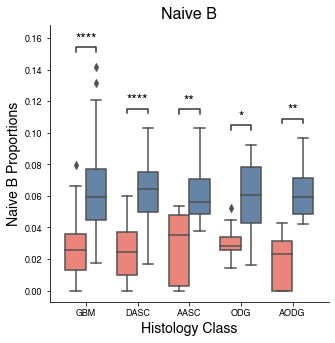

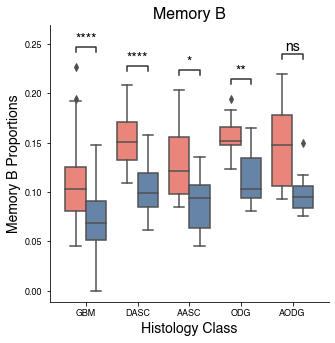

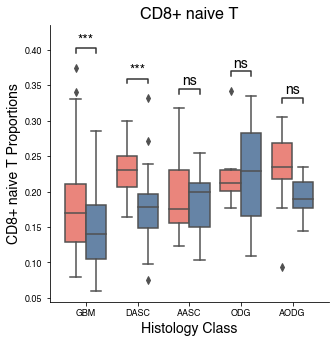

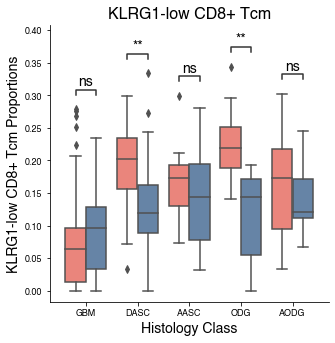

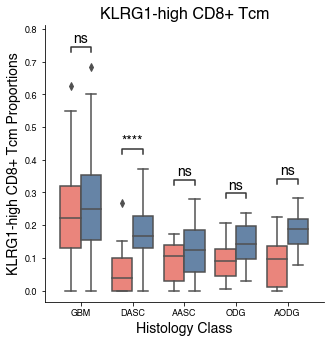

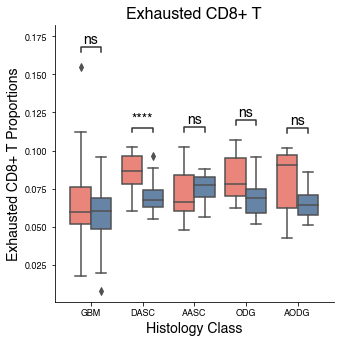

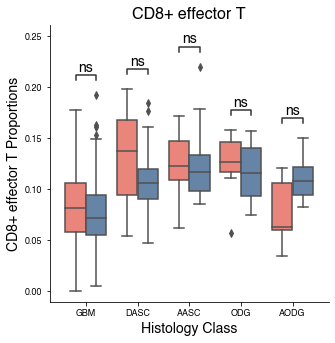

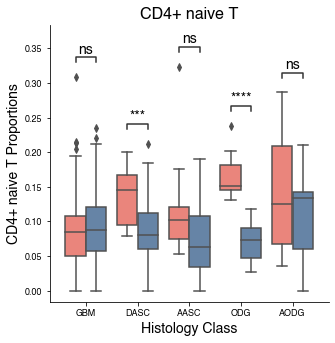

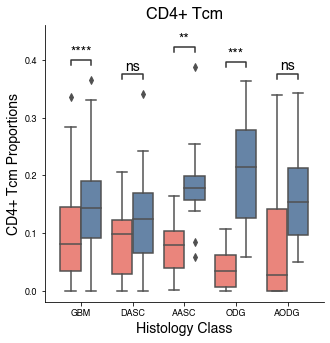

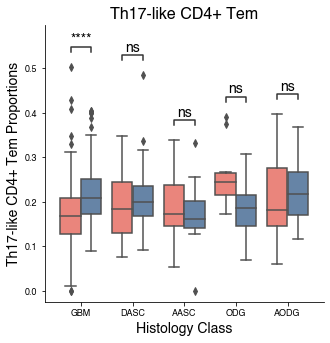

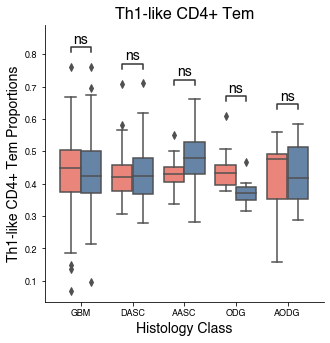

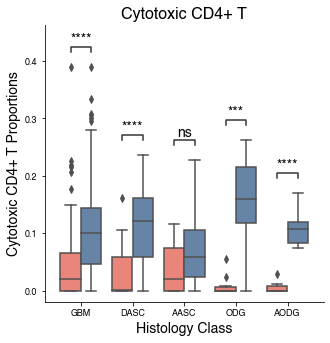

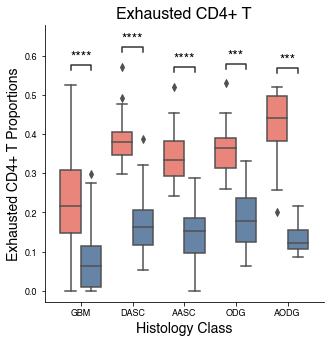

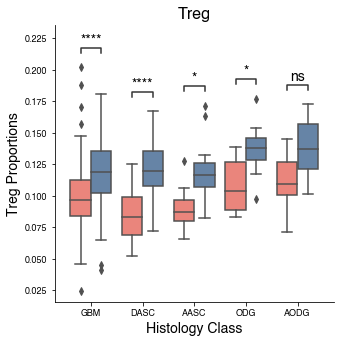

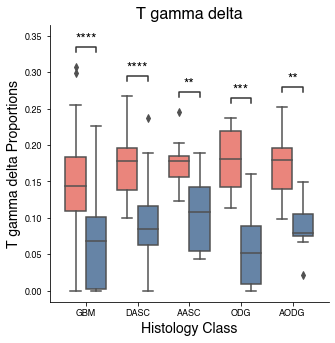

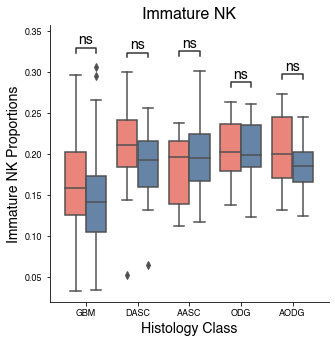

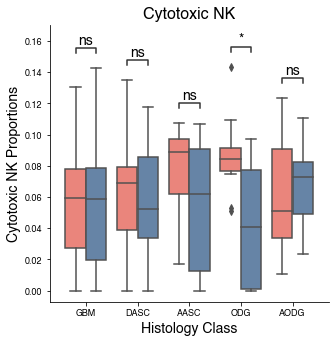

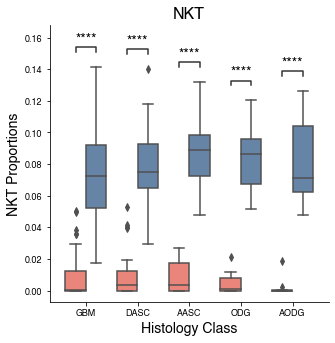

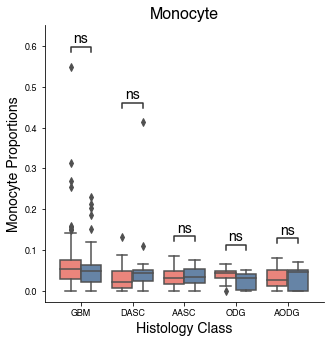

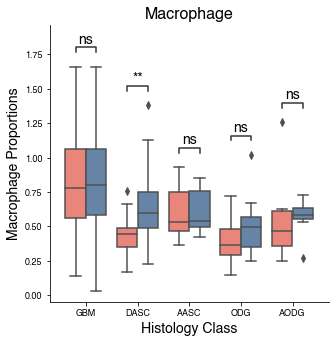

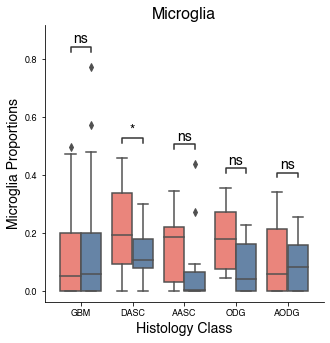

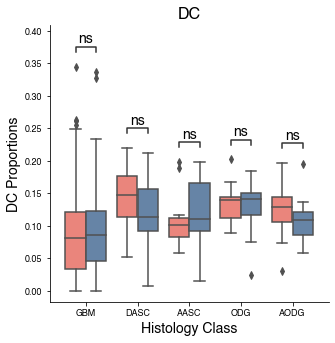

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = ["#FC766AFF","#5B84B1FF"]
sns.set_palette(sns.color_palette(colors))
import statannot
box_pairs=[
    (("Glioblastoma", "Initial"), ("Glioblastoma", "Recurrence")),
    (("Diffuse Astrocytoma", "Initial"), ("Diffuse Astrocytoma", "Recurrence")),
    (("Anaplastic Astrocytoma", "Initial"), ("Anaplastic Astrocytoma", "Recurrence")),
    (("Oligodendroglioma", "Initial"), ("Oligodendroglioma", "Recurrence")),
    (("Anaplastic Oligodendroglioma", "Initial"), ("Anaplastic Oligodendroglioma", "Recurrence"))
    ]

cells = list(Initial_absolute.T[0:22].index)
for c in cells:
    tmp = final_mdf.loc[final_mdf['variable'] == c]
    plt.figure(figsize=(5,5.1))
    #plt.rcParams['font.size'] = '8'
    plt.title(c, fontsize=16)
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
    ax = sns.boxplot(x='Histology', y='value',hue="Type", data=tmp)
    ax.set_xlabel("Histology Class", fontsize=14)
    ax.set_ylabel(c+" Proportions", fontsize=14)
    labels = ["GBM", "DASC", "AASC", "ODG", "AODG"]
    ax.set_xticklabels(labels)
    plt.legend([],[], frameon=False)
#     ax.legend(loc='upper left',bbox_to_anchor=(1,1), fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)
    sns.despine()
   
    statannot.add_stat_annotation(
        ax,
        data=tmp,
        x='Histology',
        y='value',
        hue="Type",
        box_pairs=box_pairs,
        test="t-test_ind",
        text_format="star",
        loc="inside",
    )
    plt.savefig(c+'.png')


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Diffuse Astrocytoma_Initial v.s. Diffuse Astrocytoma_Recurrence: t-test independent samples with Bonferroni correction, P_val=6.282e-07 stat=-6.083e+00
Glioblastoma_Initial v.s. Glioblastoma_Recurrence: t-test independent samples with Bonferroni correction, P_val=6.045e-08 stat=-5.900e+00
Anaplastic Astrocytoma_Initial v.s. Anaplastic Astrocytoma_Recurrence: t-test independent samples with Bonferroni correction, P_val=2.275e-02 stat=-3.159e+00
Oligodendroglioma_Initial v.s. Oligodendroglioma_Recurrence: t-test independent samples with Bonferroni correction, P_val=3.029e-02 stat=-3.109e+00
Anaplastic Oligodendroglioma_Initial v.s. Anaplastic Oligodendroglioma_Recurrence: t-test independent samples with Bonferroni correction, P_val=2.424e-01 stat=-2.161e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < 

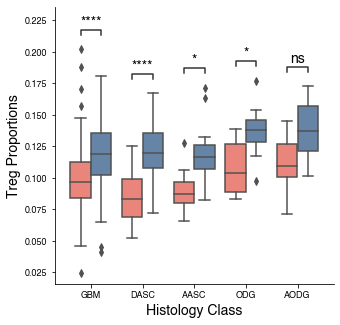

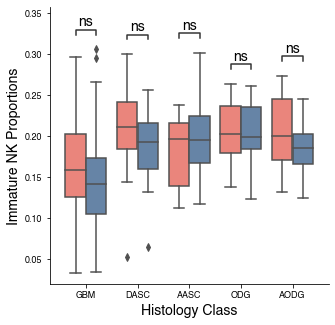

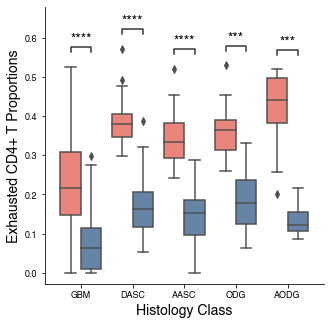

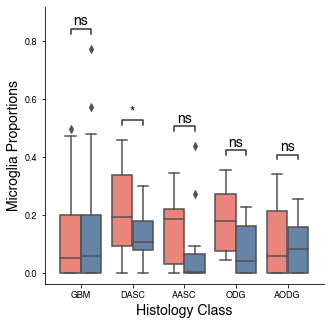

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = ["#FC766AFF","#5B84B1FF"]
sns.set_palette(sns.color_palette(colors))
import statannot
box_pairs=[
    (("Glioblastoma", "Initial"), ("Glioblastoma", "Recurrence")),
    (("Diffuse Astrocytoma", "Initial"), ("Diffuse Astrocytoma", "Recurrence")),
    (("Anaplastic Astrocytoma", "Initial"), ("Anaplastic Astrocytoma", "Recurrence")),
    (("Oligodendroglioma", "Initial"), ("Oligodendroglioma", "Recurrence")),
    (("Anaplastic Oligodendroglioma", "Initial"), ("Anaplastic Oligodendroglioma", "Recurrence"))
    ]

cells = ["Treg", "Immature NK", "Exhausted CD4+ T", "Microglia"]
for c in cells:
    tmp = final_mdf.loc[final_mdf['variable'] == c]
    plt.figure(figsize=(5,5.1))
    #plt.rcParams['font.size'] = '8'
#     plt.title(c, fontsize=16)
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
    ax = sns.boxplot(x='Histology', y='value',hue="Type", data=tmp)
    ax.set_xlabel("Histology Class", fontsize=14)
    ax.set_ylabel(c+" Proportions", fontsize=14)
    labels = ["GBM", "DASC", "AASC", "ODG", "AODG"]
    ax.set_xticklabels(labels)
    plt.legend([],[], frameon=False)
#     ax.legend(loc='upper left',bbox_to_anchor=(1,1), fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)
    sns.despine()
   
    statannot.add_stat_annotation(
        ax,
        data=tmp,
        x='Histology',
        y='value',
        hue="Type",
        box_pairs=box_pairs,
        test="t-test_ind",
        text_format="star",
        loc="inside",
    )


In [19]:
histologies = ['Glioblastoma','Diffuse Astrocytoma','Anaplastic Astrocytoma','Oligodendroglioma','Anaplastic Oligodendroglioma']

for c in cells:
    specific_cell_type = final_mdf.loc[final_mdf['variable'] == c]
    for h in histologies:
        specific_histology = specific_cell_type.loc[specific_cell_type['Histology'] == h]
        first = specific_histology.loc[specific_histology['Type'] == 'Initial']
        second = specific_histology.loc[specific_histology['Type'] == 'Recurrence']
        print(c,' - ', h)
        print('Between Initial and Recurrence: ')
        print(ranksums(first.iloc[:,4], second.iloc[:,4]))
        print ('--------------------------------')

Treg  -  Glioblastoma
Between Initial and Recurrence: 
RanksumsResult(statistic=-6.032754520621406, pvalue=1.6118818056485403e-09)
--------------------------------
Treg  -  Diffuse Astrocytoma
Between Initial and Recurrence: 
RanksumsResult(statistic=-4.719409382480127, pvalue=2.365303821523096e-06)
--------------------------------
Treg  -  Anaplastic Astrocytoma
Between Initial and Recurrence: 
RanksumsResult(statistic=-2.713546265191241, pvalue=0.006656727227605034)
--------------------------------
Treg  -  Oligodendroglioma
Between Initial and Recurrence: 
RanksumsResult(statistic=-2.7969371002682815, pvalue=0.005158957570721309)
--------------------------------
Treg  -  Anaplastic Oligodendroglioma
Between Initial and Recurrence: 
RanksumsResult(statistic=-1.7853571071357126, pvalue=0.07420341132975512)
--------------------------------
Immature NK  -  Glioblastoma
Between Initial and Recurrence: 
RanksumsResult(statistic=2.360954724764207, pvalue=0.018227955848217087)
-------------